Note: data1 is 80% trainig data and data2 is 20% testing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading of data

In [2]:
data = pd.read_csv("All comodities CPI.csv",parse_dates=True)
data

,Date,Combined
0,2013-01-01,104.6
1,2013-02-01,105.3
2,2013-03-01,105.5
3,2013-04-01,106.1
4,2013-05-01,106.9
...,...,...
108,2022-01-01,165.7
109,2022-02-01,166.1
110,2022-03-01,167.7
111,2022-04-01,170.1


In [3]:
data.isna().sum()

Date        0
Combined    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      113 non-null    object 
 1   Combined  113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"]

0     2013-01-01
1     2013-02-01
2     2013-03-01
3     2013-04-01
4     2013-05-01
         ...    
108   2022-01-01
109   2022-02-01
110   2022-03-01
111   2022-04-01
112   2022-05-01
Name: Date, Length: 113, dtype: datetime64[ns]

In [6]:
data

,Date,Combined
0,2013-01-01,104.6
1,2013-02-01,105.3
2,2013-03-01,105.5
3,2013-04-01,106.1
4,2013-05-01,106.9
...,...,...
108,2022-01-01,165.7
109,2022-02-01,166.1
110,2022-03-01,167.7
111,2022-04-01,170.1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      113 non-null    datetime64[ns]
 1   Combined  113 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [8]:
data.set_index("Date",inplace = True)

In [9]:
data   # calling date as an index

,Combined
Date,
2013-01-01,104.6
2013-02-01,105.3
2013-03-01,105.5
2013-04-01,106.1
2013-05-01,106.9
...,...
2022-01-01,165.7
2022-02-01,166.1
2022-03-01,167.7


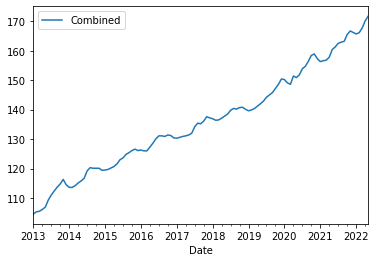

In [10]:
data.plot()

In [11]:
data1 = data.iloc[0:96]
data1

,Combined
Date,
2013-01-01,104.6
2013-02-01,105.3
2013-03-01,105.5
2013-04-01,106.1
2013-05-01,106.9
...,...
2020-08-01,154.7
2020-09-01,156.4
2020-10-01,158.4


## Checking whether the data is stationary or not

In [12]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data1)
adftest

(0.9584244228819995,
 0.9938073198804326,
 9,
 86,
 {'1%': -3.5087828609430614,
  '5%': -2.895783561573195,
  '10%': -2.5850381719848565},
 188.29339936575337)

ADF: 1.123480477030908
p value:0.9954121199565441
no of lags: 10
no of obs used for ADF Regression and critical values calculation: 102
critical values: '1%': -3.4961490537199116,
  '5%': -2.8903209639580556,
  '10%': -2.5821223452518263

In [13]:
print(" pvalue of adfuller test is:", adftest[1])

 pvalue of adfuller test is: 0.9938073198804326


If p value <=0.05 then we reject null hypothesis(data is stationary)

here p-value is greater than 0.05 so we accept null hypothesis (data is not stationary) 

### To make data stationary

In [14]:
data1["Combined first difference"]=data1-data1.shift(1)
data1

,Combined,Combined first difference
Date,,
2013-01-01,104.6,NaN
2013-02-01,105.3,0.7
2013-03-01,105.5,0.2
2013-04-01,106.1,0.6
2013-05-01,106.9,0.8
...,...,...
2020-08-01,154.7,0.8
2020-09-01,156.4,1.7
2020-10-01,158.4,2.0


In [15]:
adftest = adfuller(data1["Combined first difference"].dropna())
adftest

(-3.9383477542859184,
 0.0017700708876331784,
 8,
 86,
 {'1%': -3.5087828609430614,
  '5%': -2.895783561573195,
  '10%': -2.5850381719848565},
 186.14788719489542)

Now data is stationary

In [16]:
data1["Combined 12 difference"] = data1['Combined']-data1['Combined'].shift(12)
data1["Combined 12 difference"]

Date
2013-01-01     NaN
2013-02-01     NaN
2013-03-01     NaN
2013-04-01     NaN
2013-05-01     NaN
              ... 
2020-08-01     9.7
2020-09-01    10.6
2020-10-01    11.2
2020-11-01    10.3
2020-12-01     6.9
Name: Combined 12 difference, Length: 96, dtype: float64

## ACF and PACF Graph

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

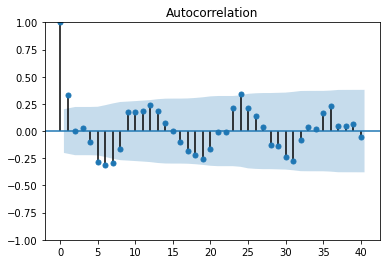

In [18]:
#fig = plt.figure(figsize=(12,8))
acf = plot_acf(data1["Combined first difference"].dropna(),lags=40)

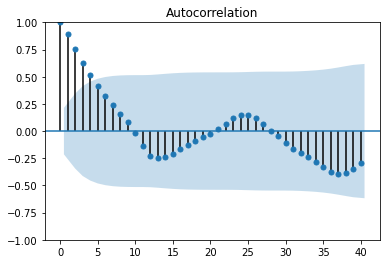

In [19]:
acf12 = plot_acf(data1["Combined 12 difference"].dropna(),lags=40)

from acf12_second graph we get the value of q = 4

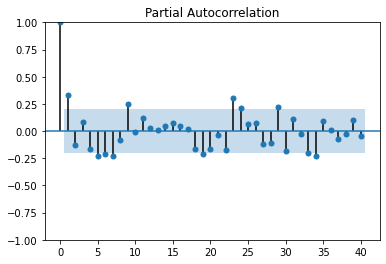

In [20]:
pacf = plot_pacf(data1["Combined first difference"].dropna(),lags=40)

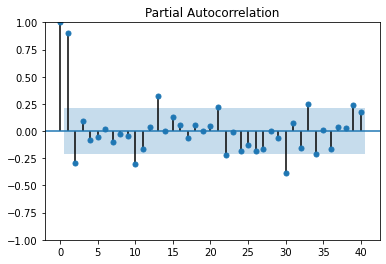

In [21]:
pacf12 = plot_pacf(data1["Combined 12 difference"].dropna(),lags=40)

From PACF we get the value of p = 5

## Sarima model fitting

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model_SARIMA = SARIMAX(data1["Combined"],order=(2,1,3),seasonal_order = (2,0,3,12))

C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\prati\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Combined   No. Observations:                   96
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 12)   Log Likelihood                -100.797
Date:                            Thu, 11 Aug 2022   AIC                            223.593
Time:                                    20:36:14   BIC                            251.686
Sample:                                01-01-2013   HQIC                           234.945
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8539      0.161      5.307      0.000       0.539       1.169
ar.L2         -0.7840      0.157     -4.986      0.000      -1.092      -0.476
ma.L1         -0.6692      0.411     -1.629      0.103      -1.474       0.136
ma.L2          0.5827      0.534      1.091      0.275      -0.464       1.629
ma.L3          0.3831      0.204      1.876      0.061      -0.017       0.783
ar.S.L12       0.2402      0.687      0.350      0.726      -1.105       1.586
ar.S.L24       0.7231      0.665      1.087      0.277      -0.581       2.027
ma.S.L12      -0.1394      0.689     -0.202      0.840      -1.490       1.212
ma.S.L24      -0.4385      0.749     -0.585      0.558      -1.907       1.030
ma.S.L36      -0.0486      0.291     -0.167      0.868      -0.620       0.523
sigma2         0.4005      0.209      1.914      0.056      -0.010       0.811
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                12.64
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                             0.57
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prediction of combined value

In [26]:
from datetime import datetime,timedelta
data1['pred_Sarima'] = model_SARIMA_fit.predict(start = datetime(2013,1,1),end = datetime(2020,12,1))
data1['pred_Sarima']

Date
2013-01-01      0.000000
2013-02-01    104.600018
2013-03-01    105.436685
2013-04-01    105.498006
2013-05-01    106.352390
                 ...    
2020-08-01    155.015442
2020-09-01    155.193692
2020-10-01    157.446244
2020-11-01    158.675386
2020-12-01    158.332938
Name: pred_Sarima, Length: 96, dtype: float64

## Residuals

In [27]:
data1['residuals'] = data1["Combined"]-data1['pred_Sarima']
data1['residuals']

Date
2013-01-01    104.600000
2013-02-01      0.699982
2013-03-01      0.063315
2013-04-01      0.601994
2013-05-01      0.547610
                 ...    
2020-08-01     -0.315442
2020-09-01      1.206308
2020-10-01      0.953756
2020-11-01      0.224614
2020-12-01     -1.032938
Name: residuals, Length: 96, dtype: float64

In [28]:
data1

,Combined,Combined first difference,Combined 12 difference,pred_Sarima,residuals
Date,,,,,
2013-01-01,104.6,NaN,NaN,0.000000,104.600000
2013-02-01,105.3,0.7,NaN,104.600018,0.699982
2013-03-01,105.5,0.2,NaN,105.436685,0.063315
2013-04-01,106.1,0.6,NaN,105.498006,0.601994
2013-05-01,106.9,0.8,NaN,106.352390,0.547610
...,...,...,...,...,...
2020-08-01,154.7,0.8,9.7,155.015442,-0.315442
2020-09-01,156.4,1.7,10.6,155.193692,1.206308
2020-10-01,158.4,2.0,11.2,157.446244,0.953756


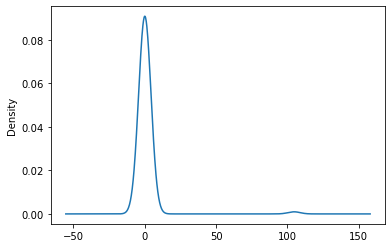

In [29]:
model_SARIMA_fit.resid.plot(kind = "kde")

In [30]:
from scipy import stats
stats.shapiro(data1["residuals"])

ShapiroResult(statistic=0.1153029203414917, pvalue=2.2008531621392366e-21)

p value greater than 0.05 means accept null hypothesis. 

Our null hypothesis : data is from normal distribution 

here Our pvalue is 1.974389 > 0.05 

so residuals are normally distributed

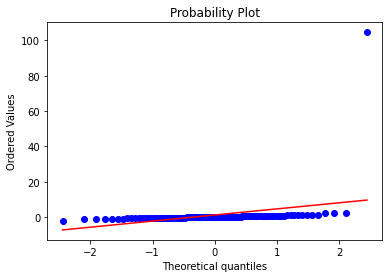

In [31]:
import pylab
from scipy import stats
stats.probplot(data1["residuals"],dist='norm',plot=pylab)
pylab.show()


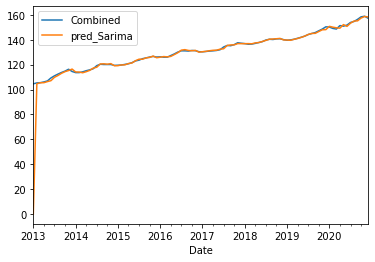

In [32]:
data1[['Combined','pred_Sarima']].plot()

#### Original dataset and our predicted values are nearby same

## Prediction from Jan 2021 to May 2022

In [33]:
data2 = data.iloc[96:113,0:1]
data2

,Combined
Date,
2021-01-01,156.3
2021-02-01,156.6
2021-03-01,156.8
2021-04-01,157.8
2021-05-01,160.4
2021-06-01,161.3
2021-07-01,162.5
2021-08-01,162.9
2021-09-01,163.2


In [34]:
pred_Sarima1 = model_SARIMA_fit.predict(start = datetime(2021,1,1),end = datetime(2022,5,1))
pred_Sarima1

2021-01-01    157.099433
2021-02-01    157.609300
2021-03-01    157.833400
2021-04-01    158.270620
2021-05-01    158.475233
2021-06-01    159.415533
2021-07-01    161.070286
2021-08-01    162.066661
2021-09-01    162.525076
2021-10-01    163.298148
2021-11-01    164.001802
2021-12-01    164.074942
2022-01-01    164.024623
2022-02-01    163.804000
2022-03-01    163.764498
2022-04-01    164.906257
2022-05-01    165.097802
Freq: MS, Name: predicted_mean, dtype: float64

In [35]:
data2['pred_Sarima1'] = pred_Sarima1

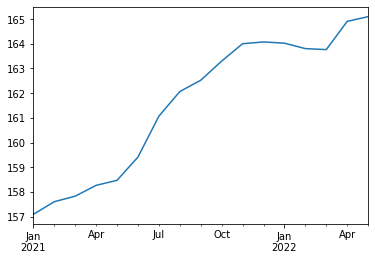

In [36]:
pred_Sarima1.plot()

In [37]:
data['pred_Sarima1'] = pred_Sarima1

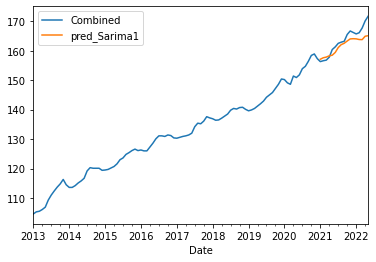

In [38]:
data[['Combined','pred_Sarima1']].plot()

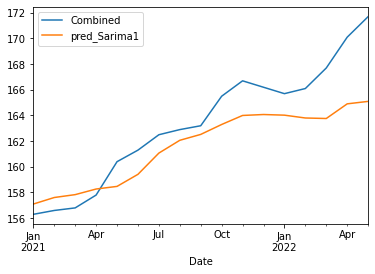

In [39]:
data2[['Combined','pred_Sarima1']].plot()

## Future prediction from June 2022 to May 2023

In [40]:
pred_Sarima2 = model_SARIMA_fit.predict(start = datetime(2022,6,1),end = datetime(2023,5,1))
pred_Sarima2

2022-06-01    166.014554
2022-07-01    167.586502
2022-08-01    168.338006
2022-09-01    168.932109
2022-10-01    169.886379
2022-11-01    170.327242
2022-12-01    169.606475
2023-01-01    169.443141
2023-02-01    169.602026
2023-03-01    169.786761
2023-04-01    170.433390
2023-05-01    170.823669
Freq: MS, Name: predicted_mean, dtype: float64

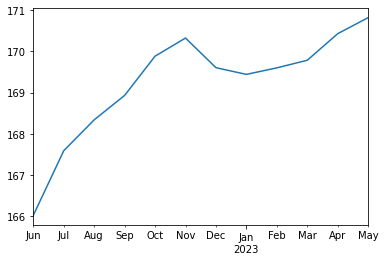

In [41]:
pred_Sarima2.plot()

In [42]:
import numpy as np
  
  
# Mean Squared Error
MSE = np.square(np.subtract(data2["Combined"],data2["pred_Sarima1"])).mean()

In [43]:
MSE

7.304244544222149